In [6]:
import torch
import matplotlib.pyplot as plt

In [7]:
from scratch import (
    Sigmoid,
    ReLU,
    MSE as lossMSE,
    SGD as optSGD,
    Adam as optAdam,
    AdamW as optAdamW,
    MLP as SeqLinear,
    LinearLayer,
    LayerNorm
)

In [8]:
torch.manual_seed(177013)

xs = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
ys = torch.tensor([[0.0], [1.0], [1.0], [0.0]]); 

net_sgd = SeqLinear(
    nout=1,
    layers=[LinearLayer(2, 4), ReLU(), LinearLayer(4, 1), Sigmoid()],
    criterion=lossMSE(),
    optimizer=optSGD(lr=0.1),  # !
)
net_sgd.train(xs, ys, 2000)

net_sgd_with_layer_norm = SeqLinear(
    nout=1,
    layers=[LinearLayer(2, 10), LayerNorm(10), ReLU(), LinearLayer(10, 1), Sigmoid()],
    criterion=lossMSE(),
    optimizer=optSGD(lr=0.1),  # !
)
net_sgd_with_layer_norm.train(xs, ys, 2000)

net_adam = SeqLinear(
    nout=1,
    layers=[LinearLayer(2, 4), ReLU(), LinearLayer(4, 1), Sigmoid()],
    criterion=lossMSE(),
    optimizer=optAdam(lr=0.1),  # !
)
net_adam.train(xs, ys, 2000)

net_adam_W = SeqLinear(
    nout=1,
    layers=[LinearLayer(2, 4), ReLU(), LinearLayer(4, 1), Sigmoid()],
    criterion=lossMSE(),
    optimizer=optAdamW(lr=0.1, weight_decay=0.01),  # !
)
net_adam_W.train(xs, ys, 2000)



2000.. Loss 0.005680279340595007
2000.. Loss 0.00024534977274015546
2000.. Loss 1.6005008092179196e-06
2000.. Loss 9.599432814866304e-05


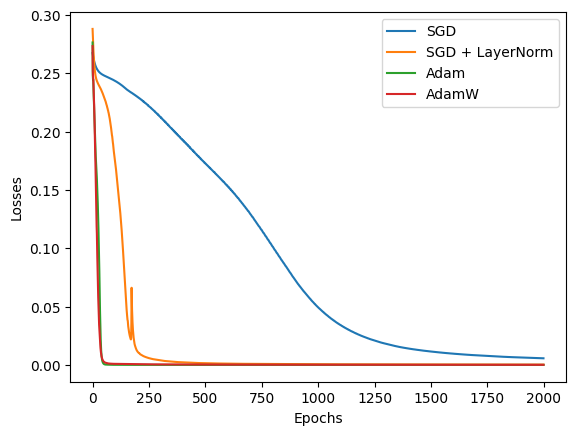

In [9]:
# Over all epochs
plt.plot(net_sgd.losses, label="SGD")
plt.plot(net_sgd_with_layer_norm.losses, label="SGD + LayerNorm")
plt.plot(net_adam.losses, label="Adam")
plt.plot(net_adam_W.losses, label="AdamW")

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

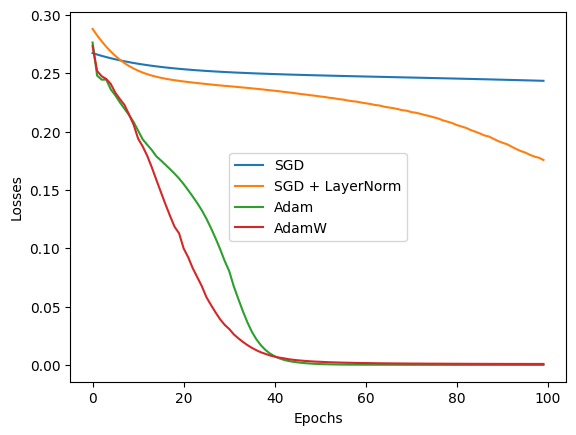

In [10]:
# Notice how fast Adan abd AdamW are..
max_epochs = 100
plt.plot(net_sgd.losses[:max_epochs], label="SGD")
plt.plot(net_sgd_with_layer_norm.losses[:max_epochs], label="SGD + LayerNorm")
plt.plot(net_adam.losses[:max_epochs], label="Adam")
plt.plot(net_adam_W.losses[:max_epochs], label="AdamW")

plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()